In [1]:
# Libraries
import torch
import math
from tqdm import trange
from slips.distributions.mog import CircularMixture
from slips.samplers.mnm import oat_sampler, make_init
from slips.samplers.mc import score_mc_est
import matplotlib.pyplot as plt

In [2]:
# Make a Pytorch device
device = torch.device('cuda')

In [3]:
# Make the target distribution
target = CircularMixture(device)

In [4]:
# Compute the right score
def sigma_sq_score(y, t, sigma, alpha, n_mc_samples=256):
    return score_mc_est(y, t, sigma, alpha, target.log_prob, return_nabla_log_p_t=True, n_mc_samples=n_mc_samples)

In [5]:
# Run the OAT algorithm
batch_size = 2048
sigma = torch.tensor(5.)
y1 = make_init((batch_size, 2), sigma=sigma, device=device)
samples = oat_sampler(y1=y1, sigma=sigma, M=128, n_mcmc_steps=32, sigma_sq_score=sigma_sq_score,
    step_size=torch.tensor(5e-1), make_init=None, verbose=True).detach().cpu()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 128/128 [01:18<00:00,  1.63it/s]


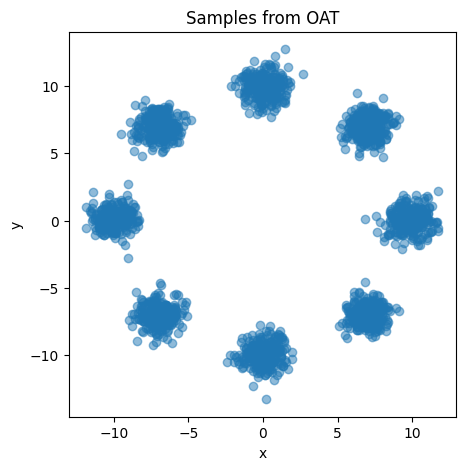

In [8]:
# Display OAT samples
plt.figure(figsize=(5,5))
plt.scatter(samples[:,0], samples[:,1], alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Samples from OAT')
plt.show()

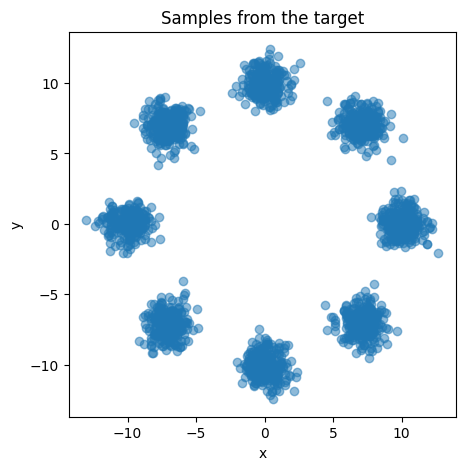

In [7]:
# Display target samples
plt.figure(figsize=(5,5))
target_samples = target.sample((batch_size,)).cpu()
plt.scatter(target_samples[:,0], target_samples[:,1], alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Samples from the target')
plt.show()